In [1]:
import pandas as pd
import numpy as np

# dim redo
from sklearn.decomposition import PCA

# viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
# load data 
bldb  = pd.read_parquet("../bldb/clean/csv/bldb_dset.parquet")
sbl = bldb[bldb.bla_class.str.contains("class_a|class_c|class_d")]
mbl = bldb[bldb.bla_class.str.contains("class_b1|class_b2|class_b3")]

# set models 
models = ["esm1b", "esm2_650m", "esm2_3b", "carp", "t5xlu50"]

# a fx to run pca 
def run_pca(model, dataset, df):
    
    # logs
    print(f"#################################################################")
    print(f"Running PCA | model = {model} | dataset = {dataset}")
    print(f"#################################################################")
    
    # set names
    dim1 = "PC1_" + model
    dim2 = "PC2_" + model
    filename = "../bldb/lowdim/pca/" + "pca_" + dataset + "_" + model + ".csv"
    
    # select embeddings
    embeddings = np.array([np.array(x) for x in df[model]])
    
    # compute pca and create a df
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embeddings)
    df_pca = pd.DataFrame(data=pca_result, columns=[dim1, dim2])
    df_pca["seq_id"] = df["seq_id"].values

    # print variance
    var_dim = pca.explained_variance_ratio_ 
    var_total = np.sum(var_dim)
    print(f"Explained variance by PC1 = {np.round(var_dim[0], 3)}")
    print(f"Explained variance by PC2 = {np.round(var_dim[1], 3)}")
    print(f"Total explained variance  = {np.round(var_total, 3)}")

    # export data
    df_pca.to_csv(filename, index=False)
    print(f"Data saved at {filename}\n")

# Run PCA

## SBL

In [10]:
for model in models:
    run_pca(model=model, dataset="sbl", df=sbl)

#################################################################
Running PCA | model = esm1b | dataset = sbl
#################################################################
Explained variance by PC1 = 0.281
Explained variance by PC2 = 0.202
Total explained variance  = 0.484
Data saved at ../bldb/lowdim/pca/pca_sbl_esm1b.csv

#################################################################
Running PCA | model = esm2_650m | dataset = sbl
#################################################################
Explained variance by PC1 = 0.269
Explained variance by PC2 = 0.176
Total explained variance  = 0.446
Data saved at ../bldb/lowdim/pca/pca_sbl_esm2_650m.csv

#################################################################
Running PCA | model = esm2_3b | dataset = sbl
#################################################################
Explained variance by PC1 = 0.346
Explained variance by PC2 = 0.198
Total explained variance  = 0.544
Data saved at ../bldb/lowdim/pca/pca_sbl_esm2_3b.csv

## MBL

In [11]:
for model in models:
    run_pca(model=model, dataset="mbl", df=mbl)

#################################################################
Running PCA | model = esm1b | dataset = mbl
#################################################################
Explained variance by PC1 = 0.366
Explained variance by PC2 = 0.118
Total explained variance  = 0.484
Data saved at ../bldb/lowdim/pca/pca_mbl_esm1b.csv

#################################################################
Running PCA | model = esm2_650m | dataset = mbl
#################################################################
Explained variance by PC1 = 0.315
Explained variance by PC2 = 0.124
Total explained variance  = 0.439
Data saved at ../bldb/lowdim/pca/pca_mbl_esm2_650m.csv

#################################################################
Running PCA | model = esm2_3b | dataset = mbl
#################################################################
Explained variance by PC1 = 0.315
Explained variance by PC2 = 0.132
Total explained variance  = 0.447
Data saved at ../bldb/lowdim/pca/pca_mbl_esm2_3b.csv

# plots

In [3]:
! ls -1  ../bldb/lowdim/pca/

pca_mbl_all_models.csv
pca_mbl_carp.csv
pca_mbl_esm1b.csv
pca_mbl_esm2_3b.csv
pca_mbl_esm2_650m.csv
pca_mbl_t5xlu50.csv
pca_sbl_all_models.csv
pca_sbl_carp.csv
pca_sbl_esm1b.csv
pca_sbl_esm2_3b.csv
pca_sbl_esm2_650m.csv
pca_sbl_t5xlu50.csv


In [4]:
# load pca  
mbl_carp      = pd.read_csv("../bldb/lowdim/pca/pca_mbl_carp.csv")
mbl_esm1b     = pd.read_csv("../bldb/lowdim/pca/pca_mbl_esm1b.csv")
mbl_esm2_3b   = pd.read_csv("../bldb/lowdim/pca/pca_mbl_esm2_3b.csv")
mbl_esm2_650m = pd.read_csv("../bldb/lowdim/pca/pca_mbl_esm2_650m.csv")
mbl_t5        = pd.read_csv("../bldb/lowdim/pca/pca_mbl_t5xlu50.csv")

sbl_carp      = pd.read_csv("../bldb/lowdim/pca/pca_sbl_carp.csv")
sbl_esm1b     = pd.read_csv("../bldb/lowdim/pca/pca_sbl_esm1b.csv")
sbl_esm2_3b   = pd.read_csv("../bldb/lowdim/pca/pca_sbl_esm2_3b.csv")
sbl_esm2_650m = pd.read_csv("../bldb/lowdim/pca/pca_sbl_esm2_650m.csv")
sbl_t5        = pd.read_csv("../bldb/lowdim/pca/pca_sbl_t5xlu50.csv")

# merge dset
pca_mbl = pd.merge(mbl_carp, mbl_esm1b, on="seq_id", how="inner")
pca_mbl = pca_mbl.merge(mbl_esm2_3b, on="seq_id", how="inner")
pca_mbl = pca_mbl.merge(mbl_esm2_650m, on="seq_id", how="inner")
pca_mbl = pca_mbl.merge(mbl_t5, on="seq_id", how="inner")

pca_sbl = pd.merge(sbl_carp, sbl_esm1b, on="seq_id", how="inner")
pca_sbl = pca_sbl.merge(sbl_esm2_3b, on="seq_id", how="inner")
pca_sbl = pca_sbl.merge(sbl_esm2_650m, on="seq_id", how="inner")
pca_sbl = pca_sbl.merge(sbl_t5, on="seq_id", how="inner")

# export pca coords
pca_mbl.to_csv("../bldb/lowdim/pca/pca_mbl_all_models.csv", index=False)
pca_sbl.to_csv("../bldb/lowdim/pca/pca_sbl_all_models.csv", index=False)

# merge annots
sbl = sbl.merge(pca_sbl, on="seq_id", how="inner")
mbl = mbl.merge(pca_mbl, on="seq_id", how="inner")
print(sbl.columns.to_list())

['#name', 'seq', 'length', 'filename', 'bla_class', 'protein_name', 'protein_family_filename', 'superfamily', 'protein_family', 'top_fam', 'seq_id', 'ambler_class', 'alternative_protein_name', 'subfamily', 'genpept_id', 'genbank_id', 'pubmed_id', 'seq_url', 'pdb_structures', 'mutants', 'phenotype', 'functional_info', 'source', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'phylo_group', 'phylo_group_genus', 'phylo_group_sp', 'bla_subclass', 'esm1b', 'esm2_650m', 'esm2_3b', 'carp', 't5xlu50', 'molecular_weight', 'aromaticity', 'instability', 'gravy', 'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet', 'pass_the_filter', 'is_clust_rep_30', 'is_clust_rep_60', 'is_clust_rep_90', 'has_af2_model', 'model', 'mean_plddt', 'resid_plddt', 'entryId', 'gene', 'uniprotAccession', 'uniprotId', 'uniprotDescription', 'taxId', 'organismScientificName', 'uniprotStart', 'uniprotEnd', 'modelCreatedDate', 'latestVersion', 'allVersions', 'isReviewed', 'isReferenceProt

In [5]:
var_sbl = {
    'esm1b':     {'pc1': 0.281, 'pc2': 0.202, 'total': 0.484},
    'esm2_650m': {'pc1': 0.269, 'pc2': 0.176, 'total': 0.446},
    'esm2_3b':   {'pc1': 0.346, 'pc2': 0.198, 'total': 0.54},
    'carp':      {'pc1': 0.412, 'pc2': 0.285, 'total': 0.696},
    't5xlu50':   {'pc1': 0.26,  'pc2': 0.135, 'total': 0.395}
}

var_mbl = {
    'esm1b':     {'pc1': 0.366, 'pc2': 0.118, 'total': 0.484},
    'esm2_650m': {'pc1': 0.315, 'pc2': 0.124, 'total': 0.439},
    'esm2_3b':   {'pc1': 0.315, 'pc2': 0.132, 'total': 0.447},
    'carp':      {'pc1': 0.436, 'pc2': 0.136, 'total': 0.572},
    't5xlu50':   {'pc1': 0.277, 'pc2': 0.104, 'total': 0.381}
}

In [8]:
var_mbl['esm1b']['pc1']

0.366

In [9]:
var_sbl['esm1b']['pc1']

0.281

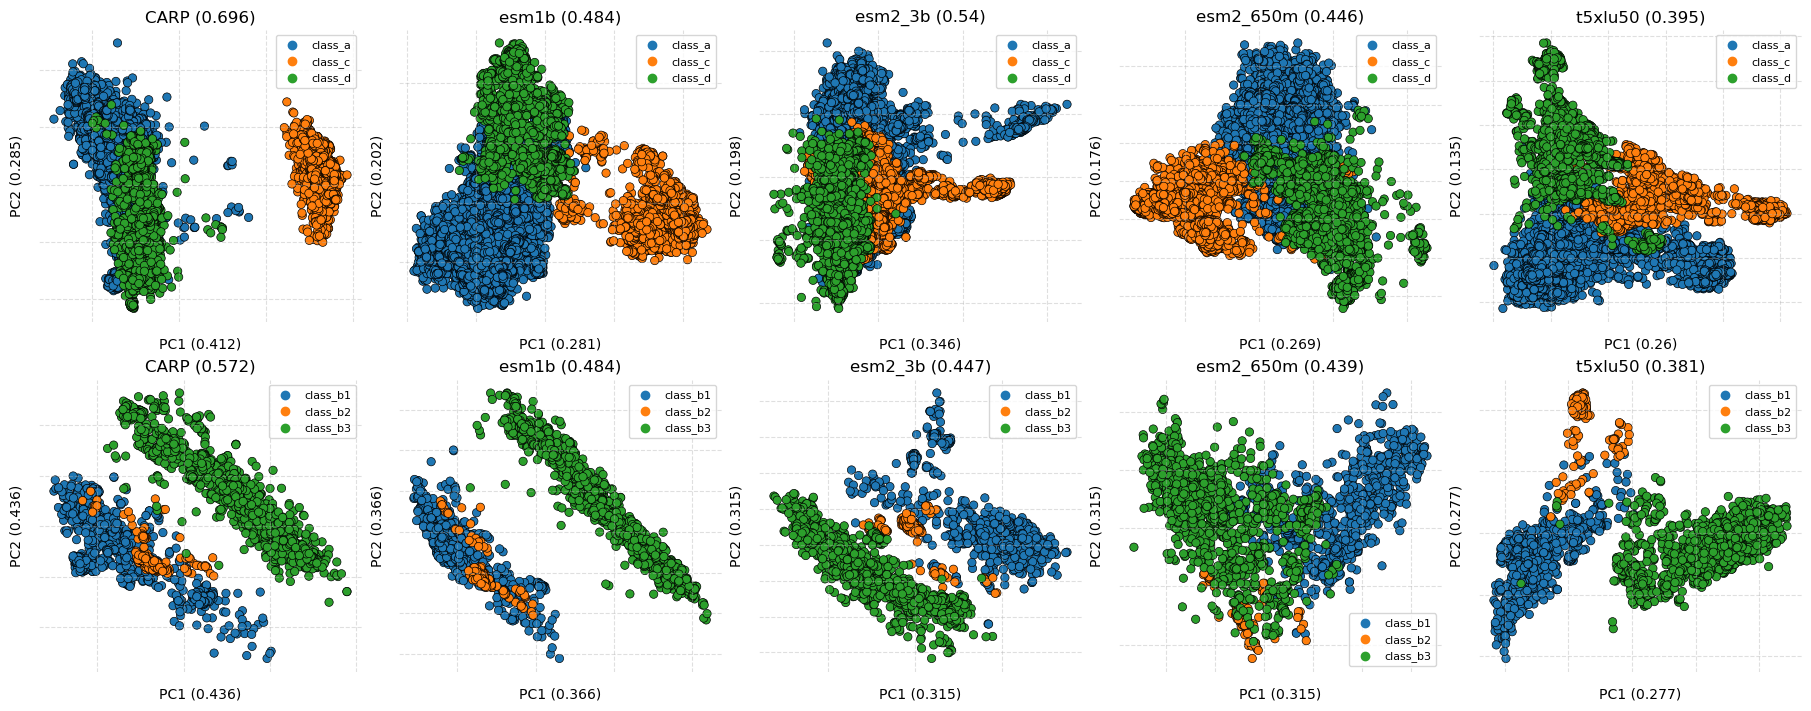

In [11]:
mosaic = """
    ABCDE
    FGHIJ
"""
hue="bla_class"

ax = plt.figure(figsize=(18,7), constrained_layout = True).subplot_mosaic(mosaic) 

# sbl
sns.scatterplot(sbl, x="PC1_carp",      y="PC2_carp",      hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(sbl, x="PC1_esm1b",     y="PC2_esm1b",     hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(sbl, x="PC1_esm2_3b",   y="PC2_esm2_3b",   hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(sbl, x="PC1_esm2_650m", y="PC2_esm2_650m", hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(sbl, x="PC1_t5xlu50",   y="PC2_t5xlu50",   hue=hue, edgecolor="k", ax=ax["E"])
# mbl
sns.scatterplot(mbl, x="PC1_carp",      y="PC2_carp",      hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(mbl, x="PC1_esm1b",     y="PC2_esm1b",     hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(mbl, x="PC1_esm2_3b",   y="PC2_esm2_3b",   hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(mbl, x="PC1_esm2_650m", y="PC2_esm2_650m", hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(mbl, x="PC1_t5xlu50",   y="PC2_t5xlu50",   hue=hue, edgecolor="k", ax=ax["J"])

# sbl title x ax
ax["A"].set_xlabel(f"PC1 ({var_sbl['carp'     ]['pc1']})")
ax["B"].set_xlabel(f"PC1 ({var_sbl['esm1b'    ]['pc1']})")
ax["C"].set_xlabel(f"PC1 ({var_sbl['esm2_3b'  ]['pc1']})")
ax["D"].set_xlabel(f"PC1 ({var_sbl['esm2_650m']['pc1']})")
ax["E"].set_xlabel(f"PC1 ({var_sbl['t5xlu50'  ]['pc1']})")
# mbl title x ax
ax["F"].set_xlabel(f"PC1 ({var_mbl['carp'     ]['pc1']})")
ax["G"].set_xlabel(f"PC1 ({var_mbl['esm1b'    ]['pc1']})")
ax["H"].set_xlabel(f"PC1 ({var_mbl['esm2_3b'  ]['pc1']})")
ax["I"].set_xlabel(f"PC1 ({var_mbl['esm2_650m']['pc1']})")
ax["J"].set_xlabel(f"PC1 ({var_mbl['t5xlu50'  ]['pc1']})")

# sbl title x ax
ax["A"].set_ylabel(f"PC2 ({var_sbl['carp'     ]['pc2']})")
ax["B"].set_ylabel(f"PC2 ({var_sbl['esm1b'    ]['pc2']})")
ax["C"].set_ylabel(f"PC2 ({var_sbl['esm2_3b'  ]['pc2']})")
ax["D"].set_ylabel(f"PC2 ({var_sbl['esm2_650m']['pc2']})")
ax["E"].set_ylabel(f"PC2 ({var_sbl['t5xlu50'  ]['pc2']})")
# mbl title x ax
ax["F"].set_ylabel(f"PC2 ({var_mbl['carp'     ]['pc1']})")
ax["G"].set_ylabel(f"PC2 ({var_mbl['esm1b'    ]['pc1']})")
ax["H"].set_ylabel(f"PC2 ({var_mbl['esm2_3b'  ]['pc1']})")
ax["I"].set_ylabel(f"PC2 ({var_mbl['esm2_650m']['pc1']})")
ax["J"].set_ylabel(f"PC2 ({var_mbl['t5xlu50'  ]['pc1']})")



# sbl titles
ax["A"].set_title(f"CARP ({     var_sbl['carp'     ]['total']})")
ax["B"].set_title(f"esm1b ({    var_sbl['esm1b'    ]['total']})")
ax["C"].set_title(f"esm2_3b ({  var_sbl['esm2_3b'  ]['total']})")
ax["D"].set_title(f"esm2_650m ({var_sbl['esm2_650m']['total']})")
ax["E"].set_title(f"t5xlu50 ({  var_sbl['t5xlu50'  ]['total']})")
# Mbl titles
ax["F"].set_title(f"CARP ({     var_mbl['carp'     ]['total']})")
ax["G"].set_title(f"esm1b ({    var_mbl['esm1b'    ]['total']})")
ax["H"].set_title(f"esm2_3b ({  var_mbl['esm2_3b'  ]['total']})")
ax["I"].set_title(f"esm2_650m ({var_mbl['esm2_650m']['total']})")
ax["J"].set_title(f"t5xlu50 ({  var_mbl['t5xlu50'  ]['total']})")

for i in "ABCDEFGHIJ":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].set_frame_on(False)
    ax[i].legend(frameon=True, fontsize=8)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params(axis='both', colors='white')
    
#plt.suptitle("Serin-betalactamases with ESM1b",fontsize=20);